# Xente Fraud Detection Challenge

### Done by: Hana Mekonen       
#### Id: WTF/23/DS/B/074

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\hp\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
#set to display all the columsn
pd.set_option('display.max_columns', 80)

In [3]:
df = pd.read_csv('training.csv')
df.head(5)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256.0,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000.0,2018-11-15T02:18:49Z,2.0,0.0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256.0,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20.0,2018-11-15T02:19:08Z,2.0,0.0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256.0,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500.0,2018-11-15T02:44:21Z,2.0,0.0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256.0,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800.0,2018-11-15T03:32:55Z,2.0,0.0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256.0,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644.0,2018-11-15T03:34:21Z,2.0,0.0


In [4]:
df.shape

(28000, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         28000 non-null  object 
 1   BatchId               28000 non-null  object 
 2   AccountId             28000 non-null  object 
 3   SubscriptionId        28000 non-null  object 
 4   CustomerId            28000 non-null  object 
 5   CurrencyCode          27999 non-null  object 
 6   CountryCode           27999 non-null  float64
 7   ProviderId            27999 non-null  object 
 8   ProductId             27999 non-null  object 
 9   ProductCategory       27999 non-null  object 
 10  ChannelId             27999 non-null  object 
 11  Amount                27999 non-null  float64
 12  Value                 27999 non-null  float64
 13  TransactionStartTime  27999 non-null  object 
 14  PricingStrategy       27999 non-null  float64
 15  FraudResult        

In [6]:
#we'll extraxt the categorical features so we can handle them separately from tje numerical 
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variabes \n'.format(len(categorical)))

print('They are: ', categorical)

There are 11 categorical variabes 

They are:  ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'TransactionStartTime']


In [7]:
df[categorical].head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStartTime
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,ProviderId_6,ProductId_10,airtime,ChannelId_3,2018-11-15T02:18:49Z
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_2,2018-11-15T02:19:08Z
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,ProviderId_6,ProductId_1,airtime,ChannelId_3,2018-11-15T02:44:21Z
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,2018-11-15T03:32:55Z
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_2,2018-11-15T03:34:21Z


In [8]:
#check formissing data 
df[categorical].isnull().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            1
ProviderId              1
ProductId               1
ProductCategory         1
ChannelId               1
TransactionStartTime    1
dtype: int64

In [9]:
df.shape

(28000, 16)

In [10]:
# removing null values
df = df.dropna()
df.shape

(27999, 16)

In [11]:
#let' check for cardinality 

for var in categorical:
    print(var, 'contains', len(df[var].unique()), 'unique values')

TransactionId contains 27999 unique values
BatchId contains 27743 unique values
AccountId contains 1426 unique values
SubscriptionId contains 1424 unique values
CustomerId contains 1492 unique values
CurrencyCode contains 1 unique values
ProviderId contains 6 unique values
ProductId contains 21 unique values
ProductCategory contains 9 unique values
ChannelId contains 4 unique values
TransactionStartTime contains 27658 unique values


In [12]:
#we need to convert the date column to datetime object 

df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

In [13]:
#extract the year 

df['Year'] = df['TransactionStartTime'].dt.year
df['Year'].head()

0    2018
1    2018
2    2018
3    2018
4    2018
Name: Year, dtype: int64

In [14]:
len(df['Year'].unique())

1

In [15]:
#extract the Month 

df['Month'] = df['TransactionStartTime'].dt.month
df['Month'].head()

0    11
1    11
2    11
3    11
4    11
Name: Month, dtype: int64

In [16]:
len(df['Month'].unique())

2

In [17]:
#extract the Day 


df['Day'] = df['TransactionStartTime'].dt.day 
df['Day'].head()

0    15
1    15
2    15
3    15
4    15
Name: Day, dtype: int64

In [18]:
len(df['Day'].unique())

30

In [19]:
#extract the Hour 


df['Hour'] = df['TransactionStartTime'].dt.hour 
df['Hour'].head()

0    2
1    2
2    2
3    3
4    3
Name: Hour, dtype: int64

In [20]:
len(df['Hour'].unique())

24

In [21]:
#extract the Minut


df['Minute'] = df['TransactionStartTime'].dt.minute 
df['Minute'].head()

0    18
1    19
2    44
3    32
4    34
Name: Minute, dtype: int64

In [22]:
len(df['Minute'].unique())

60

In [23]:
#extract the Second


df['Second'] = df['TransactionStartTime'].dt.second 
df['Second'].head()

0    49
1     8
2    21
3    55
4    21
Name: Second, dtype: int64

In [24]:
len(df['Second'].unique())

60

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27999 entries, 0 to 27998
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         27999 non-null  object             
 1   BatchId               27999 non-null  object             
 2   AccountId             27999 non-null  object             
 3   SubscriptionId        27999 non-null  object             
 4   CustomerId            27999 non-null  object             
 5   CurrencyCode          27999 non-null  object             
 6   CountryCode           27999 non-null  float64            
 7   ProviderId            27999 non-null  object             
 8   ProductId             27999 non-null  object             
 9   ProductCategory       27999 non-null  object             
 10  ChannelId             27999 non-null  object             
 11  Amount                27999 non-null  float64            
 12  Valu

In [26]:
df.drop('TransactionStartTime',axis = 1, inplace=True)
df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,Year,Month,Day,Hour,Minute,Second
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256.0,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000.0,2.0,0.0,2018,11,15,2,18,49
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256.0,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20.0,2.0,0.0,2018,11,15,2,19,8
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256.0,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500.0,2.0,0.0,2018,11,15,2,44,21
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256.0,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800.0,2.0,0.0,2018,11,15,3,32,55
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256.0,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644.0,2.0,0.0,2018,11,15,3,34,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27994,TransactionId_47289,BatchId_59642,AccountId_3890,SubscriptionId_2856,CustomerId_4336,UGX,256.0,ProviderId_6,ProductId_3,airtime,ChannelId_3,1000.0,1000.0,2.0,0.0,2018,12,15,7,24,20
27995,TransactionId_46268,BatchId_3122,AccountId_4841,SubscriptionId_3829,CustomerId_4184,UGX,256.0,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-30.0,30.0,2.0,0.0,2018,12,15,7,24,35
27996,TransactionId_52846,BatchId_94797,AccountId_4841,SubscriptionId_3829,CustomerId_4336,UGX,256.0,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50.0,2.0,0.0,2018,12,15,7,24,46
27997,TransactionId_86491,BatchId_120603,AccountId_4413,SubscriptionId_2853,CustomerId_4870,UGX,256.0,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000.0,2.0,0.0,2018,12,15,7,25,45


In [27]:
#we'll extraxt the categorical features again since we have modified our data 
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variabes \n'.format(len(categorical)))

print('They are: ', categorical)

There are 10 categorical variabes 

They are:  ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId']


In [28]:
df[categorical].isnull().sum()

TransactionId      0
BatchId            0
AccountId          0
SubscriptionId     0
CustomerId         0
CurrencyCode       0
ProviderId         0
ProductId          0
ProductCategory    0
ChannelId          0
dtype: int64

In [29]:
#we'll extraxt the numerical features 
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variabes \n'.format(len(numerical)))

print('They are: ', numerical)

There are 11 numerical variabes 

They are:  ['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']


In [30]:
df[numerical].head()

,CountryCode,Amount,Value,PricingStrategy,FraudResult,Year,Month,Day,Hour,Minute,Second
0,256.0,1000.0,1000.0,2.0,0.0,2018,11,15,2,18,49
1,256.0,-20.0,20.0,2.0,0.0,2018,11,15,2,19,8
2,256.0,500.0,500.0,2.0,0.0,2018,11,15,2,44,21
3,256.0,20000.0,21800.0,2.0,0.0,2018,11,15,3,32,55
4,256.0,-644.0,644.0,2.0,0.0,2018,11,15,3,34,21


In [31]:
df[numerical].isnull().sum()

CountryCode        0
Amount             0
Value              0
PricingStrategy    0
FraudResult        0
Year               0
Month              0
Day                0
Hour               0
Minute             0
Second             0
dtype: int64

In [32]:
df[numerical].describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult,Year,Month,Day,Hour,Minute,Second
count,27999.0,2.799900e+04,2.799900e+04,27999.000000,27999.000000,27999.0,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000
mean,256.0,5.452240e+03,1.012771e+04,2.301939,0.001714,2018.0,11.554556,14.531269,12.410622,29.701704,29.515947
std,0.0,9.445886e+04,9.409449e+04,0.806507,0.041370,0.0,0.497024,8.532564,4.812782,17.320562,17.249374
min,256.0,-2.000000e+05,2.000000e+00,0.000000,0.000000,2018.0,11.000000,1.000000,0.000000,0.000000,0.000000
25%,256.0,-8.000000e+01,2.500000e+02,2.000000,0.000000,2018.0,11.000000,7.000000,8.000000,15.000000,15.000000
50%,256.0,5.000000e+02,1.000000e+03,2.000000,0.000000,2018.0,12.000000,14.000000,13.000000,30.000000,29.000000
75%,256.0,2.000000e+03,5.000000e+03,2.000000,0.000000,2018.0,12.000000,22.000000,16.000000,45.000000,44.000000
max,256.0,5.000000e+06,5.000000e+06,4.000000,1.000000,2018.0,12.000000,30.000000,23.000000,59.000000,59.000000


Text(0, 0.5, 'PricingStrategy')

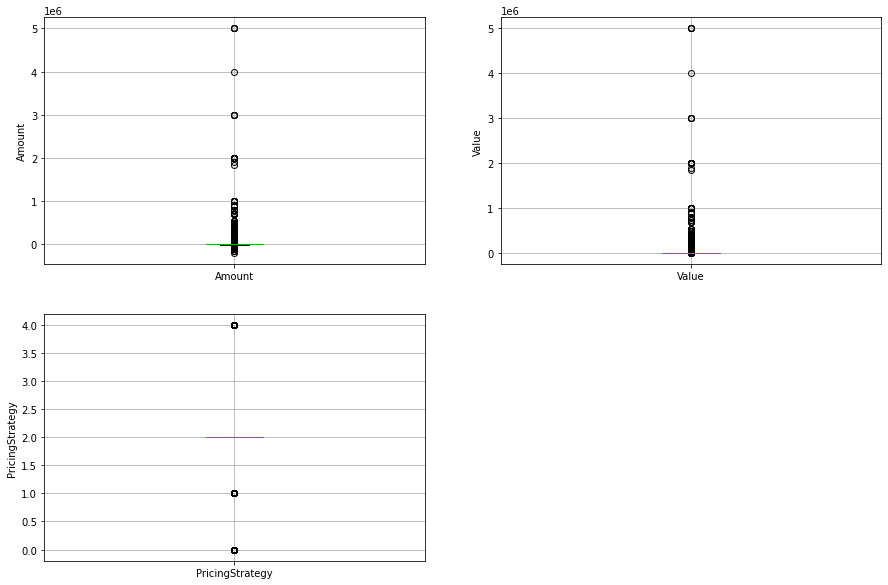

In [33]:
#set figure size
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = df.boxplot(column='Amount')
fig.set_ylabel('Amount')

plt.subplot(2,2,2)
fig = df.boxplot(column='Value')
fig.set_ylabel('Value')

plt.subplot(2,2,3)
fig = df.boxplot(column='PricingStrategy')
fig.set_ylabel('PricingStrategy')

Text(0, 0.5, 'PricingStrategy')

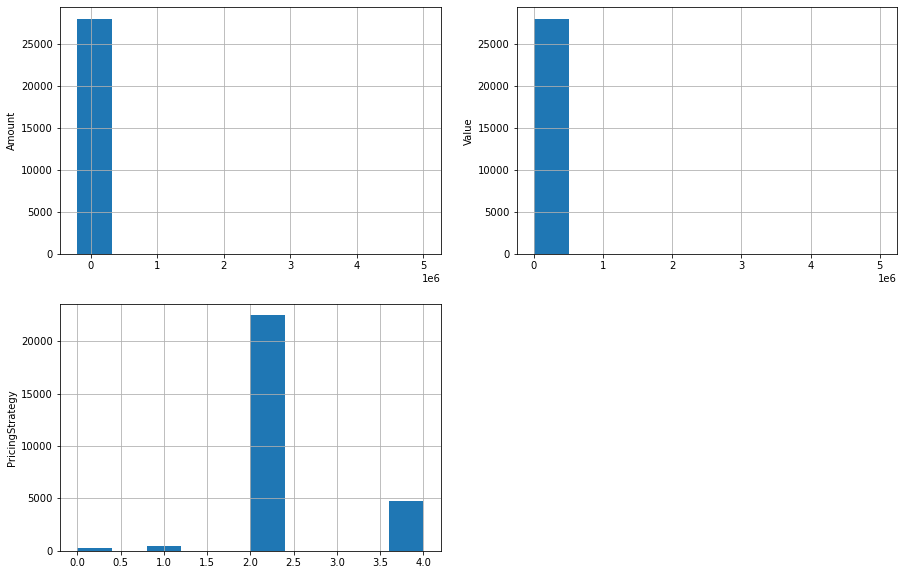

In [34]:
#set figure size
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = df.Amount.hist()
fig.set_ylabel('Amount')

plt.subplot(2,2,2)
fig = df.Value.hist()
fig.set_ylabel('Value')


plt.subplot(2,2,3)
fig = df.PricingStrategy.hist()
fig.set_ylabel('PricingStrategy')


In [35]:
df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,Year,Month,Day,Hour,Minute,Second
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256.0,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000.0,2.0,0.0,2018,11,15,2,18,49
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256.0,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20.0,2.0,0.0,2018,11,15,2,19,8
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256.0,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500.0,2.0,0.0,2018,11,15,2,44,21
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256.0,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800.0,2.0,0.0,2018,11,15,3,32,55
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256.0,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644.0,2.0,0.0,2018,11,15,3,34,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27994,TransactionId_47289,BatchId_59642,AccountId_3890,SubscriptionId_2856,CustomerId_4336,UGX,256.0,ProviderId_6,ProductId_3,airtime,ChannelId_3,1000.0,1000.0,2.0,0.0,2018,12,15,7,24,20
27995,TransactionId_46268,BatchId_3122,AccountId_4841,SubscriptionId_3829,CustomerId_4184,UGX,256.0,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-30.0,30.0,2.0,0.0,2018,12,15,7,24,35
27996,TransactionId_52846,BatchId_94797,AccountId_4841,SubscriptionId_3829,CustomerId_4336,UGX,256.0,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50.0,2.0,0.0,2018,12,15,7,24,46
27997,TransactionId_86491,BatchId_120603,AccountId_4413,SubscriptionId_2853,CustomerId_4870,UGX,256.0,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000.0,2.0,0.0,2018,12,15,7,25,45


In [36]:
df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,Year,Month,Day,Hour,Minute,Second
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256.0,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000.0,2.0,0.0,2018,11,15,2,18,49
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256.0,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20.0,2.0,0.0,2018,11,15,2,19,8
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256.0,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500.0,2.0,0.0,2018,11,15,2,44,21
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256.0,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800.0,2.0,0.0,2018,11,15,3,32,55
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256.0,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644.0,2.0,0.0,2018,11,15,3,34,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27994,TransactionId_47289,BatchId_59642,AccountId_3890,SubscriptionId_2856,CustomerId_4336,UGX,256.0,ProviderId_6,ProductId_3,airtime,ChannelId_3,1000.0,1000.0,2.0,0.0,2018,12,15,7,24,20
27995,TransactionId_46268,BatchId_3122,AccountId_4841,SubscriptionId_3829,CustomerId_4184,UGX,256.0,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-30.0,30.0,2.0,0.0,2018,12,15,7,24,35
27996,TransactionId_52846,BatchId_94797,AccountId_4841,SubscriptionId_3829,CustomerId_4336,UGX,256.0,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50.0,2.0,0.0,2018,12,15,7,24,46
27997,TransactionId_86491,BatchId_120603,AccountId_4413,SubscriptionId_2853,CustomerId_4870,UGX,256.0,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000.0,2.0,0.0,2018,12,15,7,25,45


In [37]:
df[categorical].isnull().sum()

TransactionId      0
BatchId            0
AccountId          0
SubscriptionId     0
CustomerId         0
CurrencyCode       0
ProviderId         0
ProductId          0
ProductCategory    0
ChannelId          0
dtype: int64

In [38]:
df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,Year,Month,Day,Hour,Minute,Second
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256.0,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000.0,2.0,0.0,2018,11,15,2,18,49
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256.0,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20.0,2.0,0.0,2018,11,15,2,19,8
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256.0,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500.0,2.0,0.0,2018,11,15,2,44,21
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256.0,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800.0,2.0,0.0,2018,11,15,3,32,55
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256.0,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644.0,2.0,0.0,2018,11,15,3,34,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27994,TransactionId_47289,BatchId_59642,AccountId_3890,SubscriptionId_2856,CustomerId_4336,UGX,256.0,ProviderId_6,ProductId_3,airtime,ChannelId_3,1000.0,1000.0,2.0,0.0,2018,12,15,7,24,20
27995,TransactionId_46268,BatchId_3122,AccountId_4841,SubscriptionId_3829,CustomerId_4184,UGX,256.0,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-30.0,30.0,2.0,0.0,2018,12,15,7,24,35
27996,TransactionId_52846,BatchId_94797,AccountId_4841,SubscriptionId_3829,CustomerId_4336,UGX,256.0,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50.0,2.0,0.0,2018,12,15,7,24,46
27997,TransactionId_86491,BatchId_120603,AccountId_4413,SubscriptionId_2853,CustomerId_4870,UGX,256.0,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000.0,2.0,0.0,2018,12,15,7,25,45


In [39]:
#remove the word 'TransactionId_' and extract the numbers from each TransactionId component
df['TransactionId'] = df['TransactionId'].str.replace('\D+', '')
df['BatchId'] = df['BatchId'].str.replace('\D+', '')
df['AccountId'] = df['AccountId'].str.replace('\D+', '')
df['SubscriptionId'] = df['SubscriptionId'].str.replace('\D+', '')
df['CustomerId'] = df['CustomerId'].str.replace('\D+', '')
df['ProviderId'] = df['ProviderId'].str.replace('\D+', '')
df['ProductId'] = df['ProductId'].str.replace('\D+', '')
df['ChannelId'] = df['ChannelId'].str.replace('\D+', '')

In [40]:
df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,Year,Month,Day,Hour,Minute,Second
0,76871,36123,3957,887,4406,UGX,256.0,6,10,airtime,3,1000.0,1000.0,2.0,0.0,2018,11,15,2,18,49
1,73770,15642,4841,3829,4406,UGX,256.0,4,6,financial_services,2,-20.0,20.0,2.0,0.0,2018,11,15,2,19,8
2,26203,53941,4229,222,4683,UGX,256.0,6,1,airtime,3,500.0,500.0,2.0,0.0,2018,11,15,2,44,21
3,380,102363,648,2185,988,UGX,256.0,1,21,utility_bill,3,20000.0,21800.0,2.0,0.0,2018,11,15,3,32,55
4,28195,38780,4841,3829,988,UGX,256.0,4,6,financial_services,2,-644.0,644.0,2.0,0.0,2018,11,15,3,34,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27994,47289,59642,3890,2856,4336,UGX,256.0,6,3,airtime,3,1000.0,1000.0,2.0,0.0,2018,12,15,7,24,20
27995,46268,3122,4841,3829,4184,UGX,256.0,4,6,financial_services,2,-30.0,30.0,2.0,0.0,2018,12,15,7,24,35
27996,52846,94797,4841,3829,4336,UGX,256.0,4,6,financial_services,2,-50.0,50.0,2.0,0.0,2018,12,15,7,24,46
27997,86491,120603,4413,2853,4870,UGX,256.0,5,15,financial_services,3,2000.0,2000.0,2.0,0.0,2018,12,15,7,25,45


In [41]:
#encoding categorocal data 

import category_encoders as ce

encoder =ce.BinaryEncoder(cols=['ProductCategory'])
df= encoder.fit_transform(df)


In [43]:
df = pd.concat([df[numerical], df[['ProductCategory_0', 'ProductCategory_1','ProductCategory_2','ProductCategory_3',
                                   'TransactionId','BatchId','AccountId','SubscriptionId','CustomerId','ProviderId', 
                                   'ProductId','ChannelId']],   
                    pd.get_dummies(df.CurrencyCode)], 
                   axis =1)

In [44]:
df

,CountryCode,Amount,Value,PricingStrategy,FraudResult,Year,Month,Day,Hour,Minute,Second,ProductCategory_0,ProductCategory_1,ProductCategory_2,ProductCategory_3,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId,UGX
0,256.0,1000.0,1000.0,2.0,0.0,2018,11,15,2,18,49,0,0,0,1,76871,36123,3957,887,4406,6,10,3,1
1,256.0,-20.0,20.0,2.0,0.0,2018,11,15,2,19,8,0,0,1,0,73770,15642,4841,3829,4406,4,6,2,1
2,256.0,500.0,500.0,2.0,0.0,2018,11,15,2,44,21,0,0,0,1,26203,53941,4229,222,4683,6,1,3,1
3,256.0,20000.0,21800.0,2.0,0.0,2018,11,15,3,32,55,0,0,1,1,380,102363,648,2185,988,1,21,3,1
4,256.0,-644.0,644.0,2.0,0.0,2018,11,15,3,34,21,0,0,1,0,28195,38780,4841,3829,988,4,6,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27994,256.0,1000.0,1000.0,2.0,0.0,2018,12,15,7,24,20,0,0,0,1,47289,59642,3890,2856,4336,6,3,3,1
27995,256.0,-30.0,30.0,2.0,0.0,2018,12,15,7,24,35,0,0,1,0,46268,3122,4841,3829,4184,4,6,2,1
27996,256.0,-50.0,50.0,2.0,0.0,2018,12,15,7,24,46,0,0,1,0,52846,94797,4841,3829,4336,4,6,2,1
27997,256.0,2000.0,2000.0,2.0,0.0,2018,12,15,7,25,45,0,0,1,0,86491,120603,4413,2853,4870,5,15,3,1


In [45]:
#split data into target and feature

X = df.drop(['FraudResult'], axis =1)
y= df['FraudResult']

In [46]:
#split into test and train data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

In [47]:
#check the shapeof our split 

X_train.shape, X_test.shape

((22399, 23), (5600, 23))

In [48]:
#feature scaling

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [49]:
X_test

array([[0.00000000e+00, 3.08139535e-02, 1.99200159e-04, ...,
        1.92307692e-01, 2.50000000e-01, 0.00000000e+00],
       [0.00000000e+00, 3.09961240e-02, 1.12000090e-05, ...,
        1.92307692e-01, 2.50000000e-01, 0.00000000e+00],
       [0.00000000e+00, 3.10019380e-02, 5.20000416e-06, ...,
        1.92307692e-01, 2.50000000e-01, 0.00000000e+00],
       ...,
       [0.00000000e+00, 3.12015504e-02, 1.99200159e-04, ...,
        7.69230769e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.12984496e-02, 2.99200239e-04, ...,
        3.46153846e-01, 5.00000000e-01, 0.00000000e+00],
       [0.00000000e+00, 3.12015504e-02, 1.99200159e-04, ...,
        7.69230769e-02, 5.00000000e-01, 0.00000000e+00]])

In [52]:
cols = X.columns
cols

Index(['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'Year', 'Month',
       'Day', 'Hour', 'Minute', 'Second', 'ProductCategory_0',
       'ProductCategory_1', 'ProductCategory_2', 'ProductCategory_3',
       'TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'ProviderId', 'ProductId', 'ChannelId', 'UGX'],
      dtype='object')

In [53]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_train

,CountryCode,Amount,Value,PricingStrategy,Year,Month,Day,Hour,Minute,Second,ProductCategory_0,ProductCategory_1,ProductCategory_2,ProductCategory_3,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId,UGX
0,0.0,0.038750,0.0003,0.5,0.0,0.0,1.000000,0.521739,0.050847,0.406780,0.0,0.0,0.0,1.0,0.270400,0.105304,0.190486,0.031864,0.170569,1.0,0.076923,0.50,0.0
1,0.0,0.038558,0.0001,0.5,0.0,1.0,0.413793,0.391304,0.627119,0.101695,0.0,0.0,0.0,1.0,0.121864,0.328889,0.710445,0.651148,0.518395,1.0,0.076923,0.50,0.0
2,0.0,0.043846,0.0056,0.5,0.0,0.0,0.793103,0.347826,0.355932,0.220339,0.0,1.0,0.0,1.0,0.551648,0.778695,0.724095,0.546451,0.527492,1.0,0.269231,0.50,0.0
3,0.0,0.032692,0.0060,1.0,0.0,1.0,0.103448,0.739130,0.050847,0.372881,0.0,0.0,0.0,1.0,0.266256,0.994071,0.877559,0.915787,0.982207,0.6,0.346154,0.25,0.0
4,0.0,0.038654,0.0002,0.5,0.0,0.0,0.793103,0.739130,0.661017,0.135593,0.0,0.0,0.0,1.0,0.359109,0.336244,0.277146,0.134285,0.228495,1.0,0.076923,0.50,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22394,0.0,0.042692,0.0044,0.5,0.0,1.0,0.000000,0.826087,0.508475,0.762712,0.0,0.0,0.0,1.0,0.117044,0.114237,0.724095,0.546451,0.527492,1.0,0.076923,0.50,0.0
22395,0.0,0.037500,0.0010,0.5,0.0,1.0,0.206897,0.608696,0.322034,0.711864,0.0,0.0,1.0,0.0,0.851521,0.808898,1.000000,0.791641,0.696589,0.6,0.192308,0.25,0.0
22396,0.0,0.096154,0.0600,0.0,0.0,0.0,0.931034,0.434783,0.508475,0.525424,0.0,0.0,1.0,0.0,0.117315,0.261816,0.102585,0.326712,0.111438,0.0,0.538462,0.50,0.0
22397,0.0,0.032692,0.0060,1.0,0.0,0.0,0.965517,0.652174,0.203390,0.830508,0.0,0.0,0.0,1.0,0.607586,0.977411,0.877559,0.915787,0.982207,0.6,0.076923,0.25,0.0


In [54]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [55]:
y_train.isnull().sum()

0

In [56]:
#Model training 
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', random_state=0)

logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [57]:
#test data
y_pred_test = logreg.predict(X_test)

In [58]:
y_pred_test

array([0., 0., 0., ..., 0., 0., 0.])

In [59]:
#probability of getting zero fraud

logreg.predict_proba(X_test)[:,0]

array([0.99936857, 0.99917734, 0.99914981, ..., 0.99995817, 0.99957193,
       0.99985759])

In [60]:
#probability of getting 1 fraud

logreg.predict_proba(X_test)[:,1]

array([6.31431919e-04, 8.22664376e-04, 8.50191259e-04, ...,
       4.18279836e-05, 4.28067368e-04, 1.42409587e-04])

In [61]:
#check for accuracy 

from sklearn.metrics import accuracy_score

print('Model accuracy score(test): ', accuracy_score(y_test, y_pred_test))

Model accuracy score(test):  0.9989285714285714


In [62]:
y_pred_train = logreg.predict(X_train)

print('Model accuracy score(train): ', accuracy_score(y_train, y_pred_train))

Model accuracy score(train):  0.9985267199428546


In [63]:
#model accuracy metrics for logistic regression
print('Training set score: ', logreg.score(X_train, y_train))

print('Test set score: ', logreg.score(X_test, y_test))

Training set score:  0.9985267199428546
Test set score:  0.9989285714285714


In [64]:
#null accuracy 


#we need to cmpare this null accuracy to the model accuracy 

y_test.value_counts()

0.0    5590
1.0      10
Name: FraudResult, dtype: int64

In [67]:
#check null accuracy 
null_acuracy = 5590/(len(y_test))

In [68]:
null_acuracy

0.9982142857142857

In [69]:
#null accuracy is slightly less than our actual accuracy.

In [70]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, y_pred_test)

In [71]:
cm

array([[5590,    0],
       [   6,    4]], dtype=int64)

In [72]:
print('True positives (TP) = ', cm[0,0])
print('False positives (FP)= ', cm[0, 1])
print('False Negatives (FN)= ', cm[1, 0])
print('True Negatives (TN))= ', cm[1, 1])

True positives (TP) =  5590
False positives (FP)=  0
False Negatives (FN)=  6
True Negatives (TN))=  4


In [73]:
#visualze with heatmap
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)

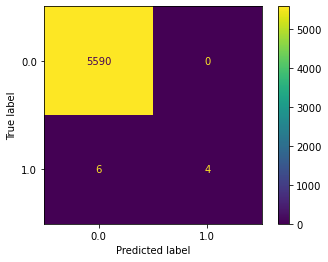

In [74]:
disp.plot()

In [75]:
from sklearn.metrics import classification_report

#classification_report(y_test, y_pred_test)

In [76]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5590
         1.0       1.00      0.40      0.57        10

    accuracy                           1.00      5600
   macro avg       1.00      0.70      0.79      5600
weighted avg       1.00      1.00      1.00      5600



In [77]:
y_pred_prob = logreg.predict_proba(X_test)
y_pred_prob

array([[9.99368568e-01, 6.31431919e-04],
       [9.99177336e-01, 8.22664376e-04],
       [9.99149809e-01, 8.50191259e-04],
       ...,
       [9.99958172e-01, 4.18279836e-05],
       [9.99571933e-01, 4.28067368e-04],
       [9.99857590e-01, 1.42409587e-04]])

In [78]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Probability of No fraud (0)',
                                                         'Probability of fraud (1)'])

y_pred_prob_df

,Probability of No fraud (0),Probability of fraud (1)
0,0.999369,0.000631
1,0.999177,0.000823
2,0.999150,0.000850
3,0.994343,0.005657
4,0.998764,0.001236
...,...,...
5595,0.999467,0.000533
5596,0.999206,0.000794
5597,0.999958,0.000042
5598,0.999572,0.000428


In [79]:
y_pred1 = logreg.predict_proba(X_test)[:,1]
y_pred0 = logreg.predict_proba(X_test)[:,0]

In [85]:
#plot ROC curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label=1)

In [86]:
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred0, pos_label=0)

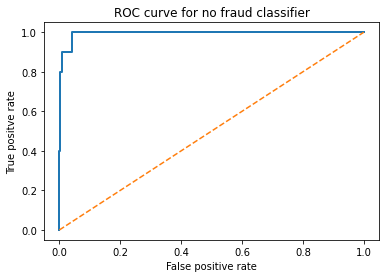

In [91]:
plt.figure(figsize = (6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], '--')
plt.title('ROC curve for no fraud classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positve rate')
plt.show()

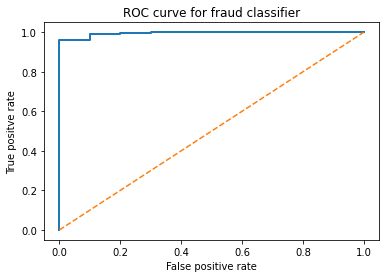

In [90]:
plt.figure(figsize = (6,4))
plt.plot(fpr2, tpr2, linewidth=2)
plt.plot([0,1], [0,1], '--')
plt.title('ROC curve for fraud classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positve rate')
plt.show()